In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [5]:
df = pd.read_csv('C:/Users/SR/Desktop/entry+assignments/ML Assignments(notebook)/CarPrice_Assignment.csv')  #loading data
df.head(20)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


# Preprocessing.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

1.*convert door number and cylinder number int o int*

In [9]:
df['doornumber'] = df['doornumber'].str.lower().str.strip()
df['cylindernumber'] = df['cylindernumber'].str.lower().str.strip()

In [10]:
print(df['doornumber'].unique())
print(df['cylindernumber'].unique())

['two' 'four']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [11]:
word_to_num = {'two': 2,'three': 3,'four': 4,'five': 5, 'six': 6, 'eight': 8,'twelve': 12}
df['doornumber'] = df['doornumber'].map(word_to_num)
df['cylindernumber'] = df['cylindernumber'].map(word_to_num)

In [12]:
print(df.dtypes[['doornumber', 'cylindernumber']])

doornumber        int64
cylindernumber    int64
dtype: object


In [13]:
print(df[df['doornumber'].isna()])
print(df[df['cylindernumber'].isna()])

Empty DataFrame
Columns: [car_ID, symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

[0 rows x 26 columns]
Empty DataFrame
Columns: [car_ID, symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

[0 rows x 26 columns]


2.*Data cleaning*

In [14]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [15]:
df['CarName'].head(10)

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
5                    audi fox
6                  audi 100ls
7                   audi 5000
8                   audi 4000
9         audi 5000s (diesel)
Name: CarName, dtype: object

In [16]:
print(sorted(df['CarName'].unique()))

['Nissan versa', 'alfa-romero Quadrifoglio', 'alfa-romero giulia', 'alfa-romero stelvio', 'audi 100 ls', 'audi 100ls', 'audi 4000', 'audi 5000', 'audi 5000s (diesel)', 'audi fox', 'bmw 320i', 'bmw x1', 'bmw x3', 'bmw x4', 'bmw x5', 'bmw z4', 'buick century', 'buick century luxus (sw)', 'buick century special', 'buick electra 225 custom', 'buick opel isuzu deluxe', 'buick regal sport coupe (turbo)', 'buick skyhawk', 'buick skylark', 'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300', 'dodge challenger se', 'dodge colt (sw)', 'dodge colt hardtop', 'dodge coronet custom', 'dodge coronet custom (sw)', 'dodge d200', 'dodge dart custom', 'dodge monaco (sw)', 'dodge rampage', 'honda accord', 'honda accord cvcc', 'honda accord lx', 'honda civic', 'honda civic (auto)', 'honda civic 1300', 'honda civic 1500 gl', 'honda civic cvcc', 'honda prelude', 'isuzu D-Max ', 'isuzu D-Max V-Cross', 'isuzu MU-X', 'jaguar xf', 'jaguar xj', 'jaguar xk', 'maxda glc deluxe', 'maxda rx3', 'mazda 6

*3.split the car name to get clear brand name to avoid complexity*.

In [17]:
df['CarBrand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())
df['CarBrand']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarBrand, Length: 205, dtype: object

In [18]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


*4.correct spelling errpr for brand names*

In [19]:
df['CarBrand'].replace({'maxda': 'mazda', 'porcshce': 'porsche', 'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'}, inplace=True)

In [20]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [21]:
print(sorted(df['CarBrand'].unique()))

['alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']


*5.Delete car name as it was replaed with car barnd name*

In [22]:
df.drop(['CarName'], axis=1, inplace=True)

In [23]:
df

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,2,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,4,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,4,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,4,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,gas,std,4,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [24]:
target = 'price'                                                                 #  get Target variable,here the target is price
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(target)   #get the Numerical columns for identifying most impotant fetures.
cat_cols = df.select_dtypes(include='object').columns                            # get the catagorical columns for identifying most impotant feturesCategorical columns

*6.Detect outliners in numerical columns*.

In [25]:
def count_outliers_iqr(df, num_cols):
    outlier_counts = {}
    total_outliers = 0

    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
        outlier_counts[col] = count
        total_outliers += count
        
    return outlier_counts, total_outliers

outliers_before, total_before = count_outliers_iqr(df, num_cols)
print("Outliers BEFORE removal:")
print(outliers_before)
print(f"Total outliers: {total_before}")

Outliers BEFORE removal:
{'car_ID': 0, 'symboling': 0, 'doornumber': 0, 'wheelbase': 3, 'carlength': 1, 'carwidth': 8, 'carheight': 0, 'curbweight': 0, 'cylindernumber': 46, 'enginesize': 10, 'boreratio': 0, 'stroke': 20, 'compressionratio': 28, 'horsepower': 6, 'peakrpm': 2, 'citympg': 2, 'highwaympg': 3}
Total outliers: 129


*7.outliner removal*.

In [26]:
def remove_outliers_iqr(df, num_cols):
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_cleaned = remove_outliers_iqr(df, num_cols)
outliers_after, total_after = count_outliers_iqr(df_cleaned, num_cols)
print("\nOutliers AFTER removal:")
print(outliers_after)
print(f"Total outliers: {total_after}")


Outliers AFTER removal:
{'car_ID': 0, 'symboling': 0, 'doornumber': 0, 'wheelbase': 13, 'carlength': 2, 'carwidth': 6, 'carheight': 2, 'curbweight': 0, 'cylindernumber': 0, 'enginesize': 0, 'boreratio': 0, 'stroke': 0, 'compressionratio': 2, 'horsepower': 1, 'peakrpm': 0, 'citympg': 0, 'highwaympg': 0}
Total outliers: 26


In [27]:
df_cleaned

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
3,4,2,gas,std,4,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
10,11,2,gas,std,2,sedan,rwd,front,101.2,176.8,...,mpfi,3.50,2.80,8.8,101,5800,23,29,16430.0,bmw
11,12,0,gas,std,4,sedan,rwd,front,101.2,176.8,...,mpfi,3.50,2.80,8.8,101,5800,23,29,16925.0,bmw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,-1,gas,std,4,wagon,rwd,front,104.3,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,13415.0,volvo
196,197,-2,gas,std,4,sedan,rwd,front,104.3,188.8,...,mpfi,3.78,3.15,9.5,114,5400,24,28,15985.0,volvo
197,198,-1,gas,std,4,wagon,rwd,front,104.3,188.8,...,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0,volvo
200,201,-1,gas,std,4,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo


In [29]:
print(df_cleaned['cylindernumber'].dtype)

int64


In [30]:
print(df_cleaned['cylindernumber'].isna().sum())

0


In [31]:
print(df_cleaned['cylindernumber'].unique())

[4]


In [32]:
print(df_cleaned['cylindernumber'].head(10))

0     4
1     4
3     4
10    4
11    4
19    4
20    4
21    4
22    4
24    4
Name: cylindernumber, dtype: int64


In [33]:
print(df_cleaned['cylindernumber'].nunique())
print(df_cleaned['cylindernumber'].value_counts())

1
cylindernumber
4    118
Name: count, dtype: int64


In [34]:
df_cleaned = df_cleaned.drop(columns=['cylindernumber'])

In [35]:
Q1 = df_cleaned['price'].quantile(0.25)
Q3 = df_cleaned['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_final = df_cleaned[(df_cleaned['price'] >= lower_bound) & (df_cleaned['price'] <= upper_bound)]

print("Shape before removing price outliers:", df_cleaned.shape)
print("Shape after removing price outliers:", df_final.shape)

Shape before removing price outliers: (118, 25)
Shape after removing price outliers: (113, 25)


In [36]:
df_final

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
3,4,2,gas,std,4,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
10,11,2,gas,std,2,sedan,rwd,front,101.2,176.8,...,mpfi,3.50,2.80,8.8,101,5800,23,29,16430.0,bmw
19,20,1,gas,std,2,hatchback,fwd,front,94.5,155.9,...,2bbl,3.03,3.11,9.6,70,5400,38,43,6295.0,chevrolet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,195,-2,gas,std,4,sedan,rwd,front,104.3,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,12940.0,volvo
195,196,-1,gas,std,4,wagon,rwd,front,104.3,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,13415.0,volvo
196,197,-2,gas,std,4,sedan,rwd,front,104.3,188.8,...,mpfi,3.78,3.15,9.5,114,5400,24,28,15985.0,volvo
197,198,-1,gas,std,4,wagon,rwd,front,104.3,188.8,...,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0,volvo


In [37]:
target = 'price'

# Numerical columns (excluding the target)
num_cols = df_final.select_dtypes(include=['int64', 'float64']).columns.drop(target)
print(num_cols)
# Categorical columns
cat_cols = df_final.select_dtypes(include='object').columns
print(cat_cols)

Index(['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg'],
      dtype='object')
Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem', 'CarBrand'],
      dtype='object')


*8.Correlation of numerical columns woth price for feature selection.*

horsepower          0.807159
curbweight          0.802753
carlength           0.739298
citympg             0.729594
highwaympg          0.725784
enginesize          0.689365
carwidth            0.678980
boreratio           0.654702
wheelbase           0.599735
carheight           0.271491
car_ID              0.224270
doornumber          0.186480
compressionratio    0.162408
symboling           0.119805
stroke              0.031628
peakrpm             0.007106
dtype: float64


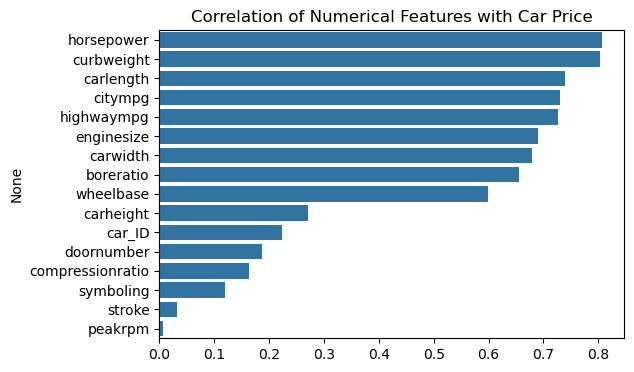

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

correlations = df_final[num_cols].corrwith(df_final[target])
correlations = correlations.abs().sort_values(ascending=False)
print(correlations)

plt.figure(figsize=(6,4))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Correlation of Numerical Features with Car Price')
plt.show()

In [39]:
selected_features = correlations[correlations > 0.5].index.tolist()
print("Most highly correlated features (correlation > 0.5):")
print(selected_features)

Most highly correlated features (correlation > 0.5):
['horsepower', 'curbweight', 'carlength', 'citympg', 'highwaympg', 'enginesize', 'carwidth', 'boreratio', 'wheelbase']


*9 Correlation using heatmap*.

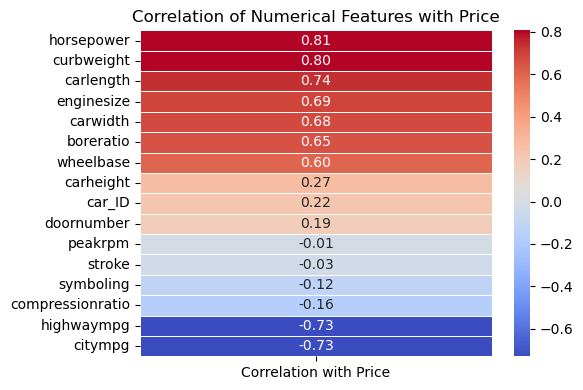


Highly correlated numerical features with price (>|0.5|):
['horsepower', 'curbweight', 'carlength', 'enginesize', 'carwidth', 'boreratio', 'wheelbase', 'highwaympg', 'citympg']


In [40]:
correlations = df_final[num_cols].corrwith(df_final[target])
corr_df = correlations.to_frame(name='Correlation with Price').sort_values(by='Correlation with Price', ascending=False)

plt.figure(figsize=(6, 4))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Correlation of Numerical Features with Price")
plt.tight_layout()
plt.show()

threshold = 0.5
high_corr_features = correlations[correlations.abs() > threshold].sort_values(ascending=False)
selected_features = high_corr_features.index.tolist()

print("\nHighly correlated numerical features with price (>|0.5|):")
print(selected_features)

In [41]:
print(cat_cols)

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem', 'CarBrand'],
      dtype='object')


*10 Encoding catagorical columns for doing feature selction.*

In [42]:
import pandas as pd
cat_cols = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
            'enginetype', 'fuelsystem', 'CarBrand']

df_encoded = pd.get_dummies(df_final, columns=cat_cols, drop_first=True)
print(df_encoded.shape)
print(df_encoded.columns)

(113, 47)
Index(['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'fuelsystem_2bbl', 'fuelsystem_mpfi', 'fuelsystem_spfi',
       'CarBrand_audi', 'CarBrand_bmw', 'CarBrand_chevrolet', 'CarBrand_dodge',
       'CarBrand_honda', 'CarBrand_isuzu', 'CarBrand_mazda',
       'CarBrand_mitsubishi', 'CarBrand_nissan', 'CarBrand_peugeot',
       'CarBrand_plymouth', 'CarBrand_renault', 'CarBrand_saab',
       'CarBrand_subaru', 'CarBrand_toyota', 'CarBrand_volkswagen',
       'CarBrand_volvo'],
      dtype='object')


In [43]:
df_encoded

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,CarBrand_mitsubishi,CarBrand_nissan,CarBrand_peugeot,CarBrand_plymouth,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_volkswagen,CarBrand_volvo
0,1,3,2,88.6,168.8,64.1,48.8,2548,130,3.47,...,False,False,False,False,False,False,False,False,False,False
1,2,3,2,88.6,168.8,64.1,48.8,2548,130,3.47,...,False,False,False,False,False,False,False,False,False,False
3,4,2,4,99.8,176.6,66.2,54.3,2337,109,3.19,...,False,False,False,False,False,False,False,False,False,False
10,11,2,2,101.2,176.8,64.8,54.3,2395,108,3.50,...,False,False,False,False,False,False,False,False,False,False
19,20,1,2,94.5,155.9,63.6,52.0,1874,90,3.03,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,195,-2,4,104.3,188.8,67.2,56.2,2912,141,3.78,...,False,False,False,False,False,False,False,False,False,True
195,196,-1,4,104.3,188.8,67.2,57.5,3034,141,3.78,...,False,False,False,False,False,False,False,False,False,True
196,197,-2,4,104.3,188.8,67.2,56.2,2935,141,3.78,...,False,False,False,False,False,False,False,False,False,True
197,198,-1,4,104.3,188.8,67.2,57.5,3042,141,3.78,...,False,False,False,False,False,False,False,False,False,True


In [44]:
import pandas as pd
pd.set_option('display.max_columns', None)
print(df_encoded.head())

    car_ID  symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
0        1          3           2       88.6      168.8      64.1       48.8   
1        2          3           2       88.6      168.8      64.1       48.8   
3        4          2           4       99.8      176.6      66.2       54.3   
10      11          2           2      101.2      176.8      64.8       54.3   
19      20          1           2       94.5      155.9      63.6       52.0   

    curbweight  enginesize  boreratio  stroke  compressionratio  horsepower  \
0         2548         130       3.47    2.68               9.0         111   
1         2548         130       3.47    2.68               9.0         111   
3         2337         109       3.19    3.40              10.0         102   
10        2395         108       3.50    2.80               8.8         101   
19        1874          90       3.03    3.11               9.6          70   

    peakrpm  citympg  highwaympg    price  a

*11.Correlation between catagoricl columns and price.*

In [45]:
cat_cols = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
            'enginetype', 'fuelsystem', 'CarBrand']

cat_encoded_cols = [col for col in df_encoded.columns if any(cat in col for cat in cat_cols)]
cat_corr_with_price = df_encoded[cat_encoded_cols].corrwith(df_encoded['price']).sort_values(ascending=False)

print(cat_corr_with_price)

fuelsystem_mpfi        0.734500
drivewheel_rwd         0.562762
CarBrand_volvo         0.474651
CarBrand_peugeot       0.275498
enginetype_l           0.275498
CarBrand_bmw           0.252635
CarBrand_saab          0.246760
CarBrand_audi          0.167681
carbody_sedan          0.138441
aspiration_turbo       0.117834
carbody_wagon          0.102895
CarBrand_volkswagen    0.068402
fuelsystem_spfi        0.068270
CarBrand_renault       0.026275
carbody_hardtop        0.022844
CarBrand_isuzu        -0.009623
CarBrand_subaru       -0.024121
enginetype_ohcf       -0.024121
CarBrand_toyota       -0.079001
CarBrand_honda        -0.091000
CarBrand_mazda        -0.101107
CarBrand_chevrolet    -0.127500
CarBrand_plymouth     -0.159945
CarBrand_nissan       -0.172267
CarBrand_mitsubishi   -0.177510
CarBrand_dodge        -0.185007
enginetype_ohc        -0.215897
carbody_hatchback     -0.325997
drivewheel_fwd        -0.511894
fuelsystem_2bbl       -0.623002
dtype: float64


In [49]:
threshold = 0.1  
important_features = cat_corr_with_price[abs(cat_corr_with_price) >= threshold].index.tolist()

print("Most important features based on correlation threshold:")
print(important_features)

Most important features based on correlation threshold:
['fuelsystem_mpfi', 'drivewheel_rwd', 'CarBrand_volvo', 'CarBrand_peugeot', 'enginetype_l', 'CarBrand_bmw', 'CarBrand_saab', 'CarBrand_audi', 'carbody_sedan', 'aspiration_turbo', 'carbody_wagon', 'CarBrand_mazda', 'CarBrand_chevrolet', 'CarBrand_plymouth', 'CarBrand_nissan', 'CarBrand_mitsubishi', 'CarBrand_dodge', 'enginetype_ohc', 'carbody_hatchback', 'drivewheel_fwd', 'fuelsystem_2bbl']


In [50]:
df_encoded

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_l,enginetype_ohc,enginetype_ohcf,fuelsystem_2bbl,fuelsystem_mpfi,fuelsystem_spfi,CarBrand_audi,CarBrand_bmw,CarBrand_chevrolet,CarBrand_dodge,CarBrand_honda,CarBrand_isuzu,CarBrand_mazda,CarBrand_mitsubishi,CarBrand_nissan,CarBrand_peugeot,CarBrand_plymouth,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_volkswagen,CarBrand_volvo
0,1,3,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,3,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,2,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,False,False,False,True,False,True,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10,11,2,2,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,8.8,101,5800,23,29,16430.0,False,False,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19,20,1,2,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.6,70,5400,38,43,6295.0,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,195,-2,4,104.3,188.8,67.2,56.2,2912,141,3.78,3.15,9.5,114,5400,23,28,12940.0,False,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
195,196,-1,4,104.3,188.8,67.2,57.5,3034,141,3.78,3.15,9.5,114,5400,23,28,13415.0,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
196,197,-2,4,104.3,188.8,67.2,56.2,2935,141,3.78,3.15,9.5,114,5400,24,28,15985.0,False,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
197,198,-1,4,104.3,188.8,67.2,57.5,3042,141,3.78,3.15,9.5,114,5400,24,28,16515.0,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


*12.Final data frame with numerical column and encoded catagorical columns.*

In [51]:
final_important_features = selected_features + important_features
final_important_features_with_target = final_important_features + ['price']

df_impt = df_encoded[final_important_features_with_target]

print("Final DataFrame shape:", df_impt.shape)
print("Final features for training (including target):")
print(df_impt.columns.tolist())

Final DataFrame shape: (113, 31)
Final features for training (including target):
['horsepower', 'curbweight', 'carlength', 'enginesize', 'carwidth', 'boreratio', 'wheelbase', 'highwaympg', 'citympg', 'fuelsystem_mpfi', 'drivewheel_rwd', 'CarBrand_volvo', 'CarBrand_peugeot', 'enginetype_l', 'CarBrand_bmw', 'CarBrand_saab', 'CarBrand_audi', 'carbody_sedan', 'aspiration_turbo', 'carbody_wagon', 'CarBrand_mazda', 'CarBrand_chevrolet', 'CarBrand_plymouth', 'CarBrand_nissan', 'CarBrand_mitsubishi', 'CarBrand_dodge', 'enginetype_ohc', 'carbody_hatchback', 'drivewheel_fwd', 'fuelsystem_2bbl', 'price']


In [52]:
df_impt

,horsepower,curbweight,carlength,enginesize,carwidth,boreratio,wheelbase,highwaympg,citympg,fuelsystem_mpfi,drivewheel_rwd,CarBrand_volvo,CarBrand_peugeot,enginetype_l,CarBrand_bmw,CarBrand_saab,CarBrand_audi,carbody_sedan,aspiration_turbo,carbody_wagon,CarBrand_mazda,CarBrand_chevrolet,CarBrand_plymouth,CarBrand_nissan,CarBrand_mitsubishi,CarBrand_dodge,enginetype_ohc,carbody_hatchback,drivewheel_fwd,fuelsystem_2bbl,price
0,111,2548,168.8,130,64.1,3.47,88.6,27,21,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,13495.0
1,111,2548,168.8,130,64.1,3.47,88.6,27,21,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,16500.0
3,102,2337,176.6,109,66.2,3.19,99.8,30,24,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,True,False,13950.0
10,101,2395,176.8,108,64.8,3.50,101.2,29,23,True,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,16430.0
19,70,1874,155.9,90,63.6,3.03,94.5,43,38,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True,True,6295.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,114,2912,188.8,141,67.2,3.78,104.3,28,23,True,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,12940.0
195,114,3034,188.8,141,67.2,3.78,104.3,28,23,True,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,13415.0
196,114,2935,188.8,141,67.2,3.78,104.3,28,24,True,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,15985.0
197,114,3042,188.8,141,67.2,3.78,104.3,28,24,True,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,16515.0


In [55]:
X =df_impt.drop('price', axis=1)
print(X)
y = df_impt['price']
print(y)

     horsepower  curbweight  carlength  enginesize  carwidth  boreratio  \
0           111        2548      168.8         130      64.1       3.47   
1           111        2548      168.8         130      64.1       3.47   
3           102        2337      176.6         109      66.2       3.19   
10          101        2395      176.8         108      64.8       3.50   
19           70        1874      155.9          90      63.6       3.03   
..          ...         ...        ...         ...       ...        ...   
194         114        2912      188.8         141      67.2       3.78   
195         114        3034      188.8         141      67.2       3.78   
196         114        2935      188.8         141      67.2       3.78   
197         114        3042      188.8         141      67.2       3.78   
200         114        2952      188.8         141      68.9       3.78   

     wheelbase  highwaympg  citympg  fuelsystem_mpfi  drivewheel_rwd  \
0         88.6          27 

# Training and Testing.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

*Model Implementation*

*LinearRegression*.

In [58]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()          # Initialize Linear Regression model
LR.fit(X_train, y_train)         # Fit model on training data
y_pred_LR = LR.predict(X_test)   # Predict car prices on test data

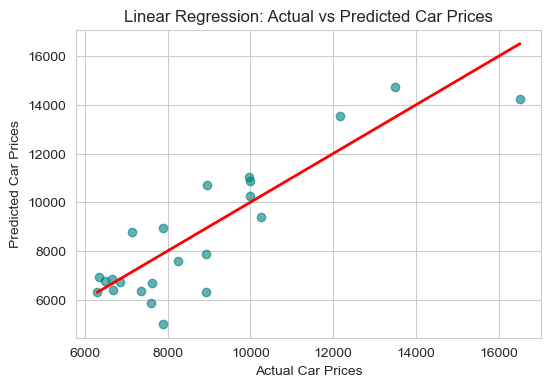

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")

plt.scatter(y_test, y_pred_LR, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Perfect prediction line
plt.xlabel("Actual Car Prices")
plt.ylabel("Predicted Car Prices")
plt.title("Linear Regression: Actual vs Predicted Car Prices")
plt.show()

*DecisionTreeRegressor*

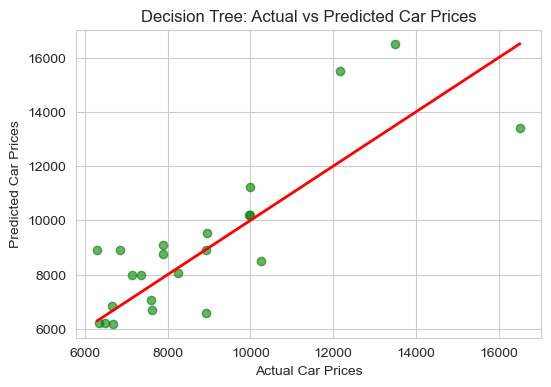

In [91]:
DT = DecisionTreeRegressor(random_state=42)
DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)

plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")

plt.scatter(y_test, y_pred_DT, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Perfect prediction line
plt.xlabel("Actual Car Prices")
plt.ylabel("Predicted Car Prices")
plt.title("Decision Tree: Actual vs Predicted Car Prices")
plt.show()

*RandomForestRegressor*

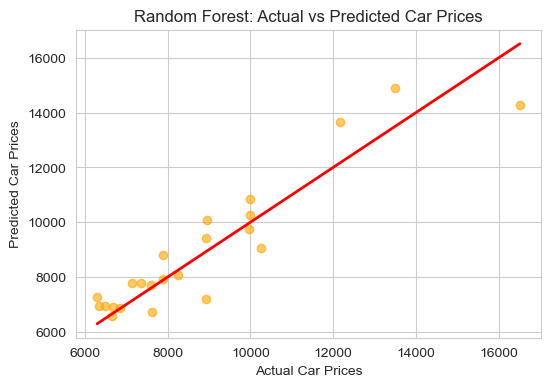

In [90]:
RF = RandomForestRegressor(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)

y_pred_RF = RF.predict(X_test)

plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")

plt.scatter(y_test, y_pred_RF, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Perfect prediction line
plt.xlabel("Actual Car Prices")
plt.ylabel("Predicted Car Prices")
plt.title("Random Forest: Actual vs Predicted Car Prices")
plt.show()

*RandomForestRegressor*

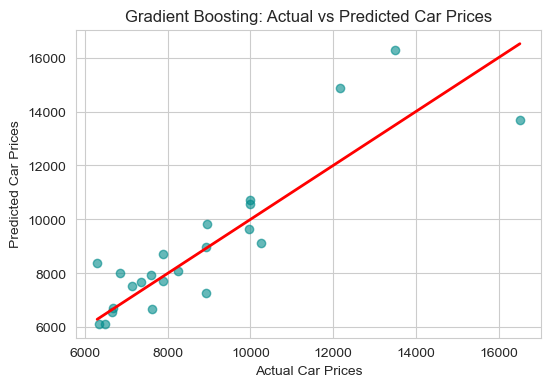

In [89]:
GB = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
GB.fit(X_train, y_train)

y_pred_GB = GB.predict(X_test)

plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")

plt.scatter(y_test, y_pred_GB, color='darkcyan', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual Car Prices")
plt.ylabel("Predicted Car Prices")
plt.title("Gradient Boosting: Actual vs Predicted Car Prices")
plt.show()

*RandomForestRegressor*

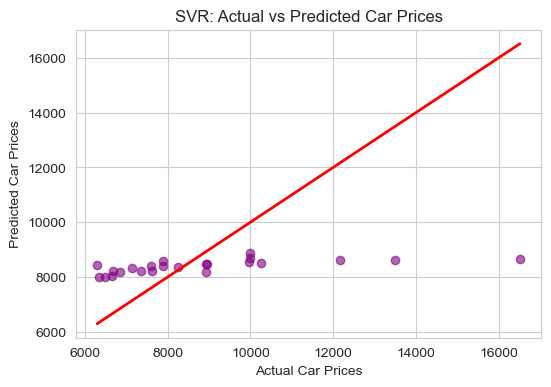

In [88]:
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")

plt.scatter(y_test, y_pred_svr, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual Car Prices")
plt.ylabel("Predicted Car Prices")
plt.title("SVR: Actual vs Predicted Car Prices")
plt.show()

*Model Evaluation*

In [93]:
def evaluate_model(y_test, y_pred):
    return {
        'R2 Score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred)
    }

results = {
    'Linear Regression': evaluate_model(y_test, y_pred_LR),
    'Decision Tree': evaluate_model(y_test, y_pred_DT),
    'Random Forest': evaluate_model(y_test, y_pred_RF),
    'Gradient Boosting': evaluate_model(y_test, y_pred_GB),
    'SVR': evaluate_model(y_test, y_pred_svr)
}

pd.DataFrame(results).T

,R2 Score,MSE,MAE
Linear Regression,0.710023,1.759815e+06,1080.029084
Decision Tree,0.595705,2.453584e+06,1166.021739
Random Forest,0.858812,8.568406e+05,717.664565
Gradient Boosting,0.737638,1.592225e+06,903.332833
SVR,0.094164,5.497339e+06,1647.477929


In [65]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
baseline_mean = np.full_like(y_test, fill_value=y_test.mean())

In [66]:
print("Baseline (Mean) Evaluation:")
print("MAE:", mean_absolute_error(y_test, baseline_mean))
print("MSE:", mean_squared_error(y_test, baseline_mean))
print("R2 Score:", r2_score(y_test, baseline_mean))

Baseline (Mean) Evaluation:
MAE: 1848.3497164461246
MSE: 6068801.20510397
R2 Score: 0.0


*All models except SVR performed better than the baseline:*

  *Random Forest is the best model here*
  *Highest R² (0.859 explains 86% of the variance)*.
  *Lowest MAE and MSE.*

*Feature Importanace_Random forest.*

                Feature  Importance
0            horsepower    0.495802
7            highwaympg    0.127229
1            curbweight    0.116387
2             carlength    0.056634
6             wheelbase    0.046202
8               citympg    0.031217
9       fuelsystem_mpfi    0.030505
4              carwidth    0.025092
5             boreratio    0.012533
3            enginesize    0.012144
17        carbody_sedan    0.008963
27    carbody_hatchback    0.008891
10       drivewheel_rwd    0.006275
19        carbody_wagon    0.005298
16        CarBrand_audi    0.005128
14         CarBrand_bmw    0.003769
11       CarBrand_volvo    0.001848
24  CarBrand_mitsubishi    0.001194
26       enginetype_ohc    0.000993
28       drivewheel_fwd    0.000942
29      fuelsystem_2bbl    0.000666
15        CarBrand_saab    0.000455
18     aspiration_turbo    0.000428
12     CarBrand_peugeot    0.000390
23      CarBrand_nissan    0.000362
25       CarBrand_dodge    0.000195
20       CarBrand_mazda    0

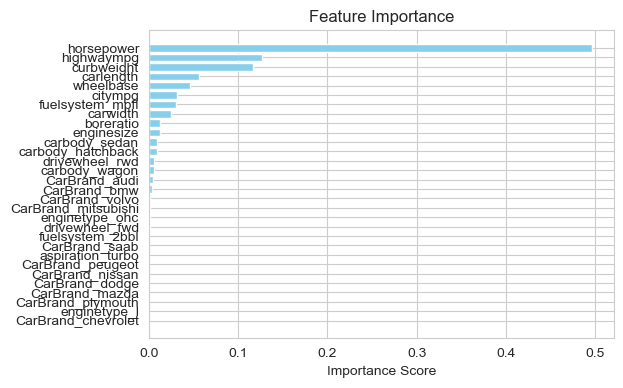

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

importances = RF.feature_importances_ 
features = X_train.columns

feat_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)
print(feat_importance)
plt.figure(figsize=(6, 4))
plt.barh(feat_importance['Feature'], feat_importance['Importance'], color='skyblue')
plt.xlabel("Importance Score")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show()

*Feature importance was evaluated using the Random Forest Regressor.
The model identified the most influential features for car price prediction as follows:*

*Horsepower (importance score: 0.496)
Highway MPG (0.127)
Curb Weight (0.116)
Car Length (0.057)
Wheelbase (0.046)*

*Hyper parameter tuning*

In [70]:
from sklearn.model_selection import GridSearchCV

In [74]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],         # number of trees
    'max_depth': [None, 10, 20],             # tree depth
    'min_samples_split': [2, 5, 10],         # min samples to split a node
    'min_samples_leaf': [1, 2, 4]            # min samples at a leaf
}

In [75]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

In [78]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [79]:
best_rf = grid_search.best_estimator_                       # after doing gridserch and tuining we get the bset tree model with highest accuaracy score.
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


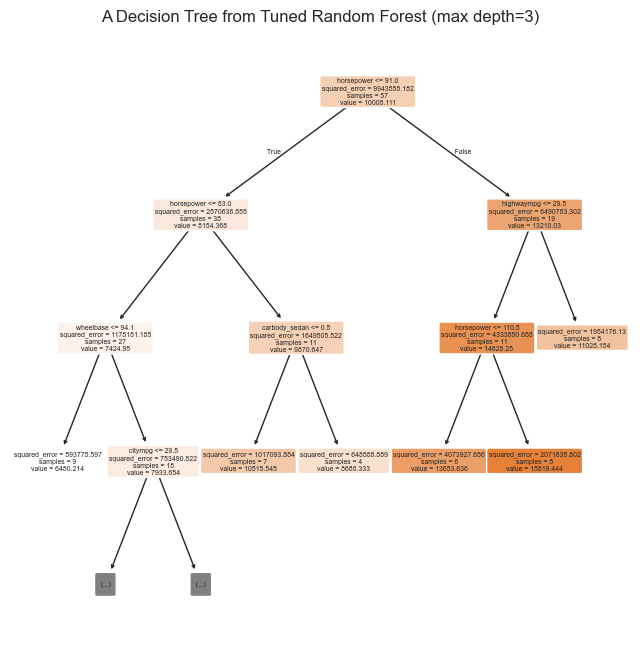

In [94]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

plot_tree(best_rf.estimators_[0],               
    feature_names=X_train.columns,        
    filled=True,                        
    rounded=True,                       
    max_depth=3                        
)
plt.title("A Decision Tree from Tuned Random Forest (max depth=3)")
plt.show()

*Predication with new tuned  model*

In [81]:
y_pred_best = best_rf.predict(X_test)

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("After Tuning:")
print("R² Score:", r2_score(y_test, y_pred_best))
print("MSE:", mean_squared_error(y_test, y_pred_best))
print("MAE:", mean_absolute_error(y_test, y_pred_best))

After Tuning:
R² Score: 0.8719047850783183
MSE: 777384.3946847542
MAE: 675.4829106884258


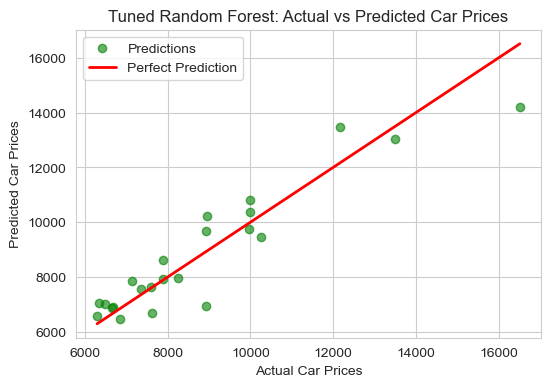

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
y_pred_best = best_rf.predict(X_test)
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")
plt.scatter(y_test, y_pred_best, color='green', alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')

plt.xlabel("Actual Car Prices")
plt.ylabel("Predicted Car Prices")
plt.title("Tuned Random Forest: Actual vs Predicted Car Prices")
plt.legend()
plt.show()

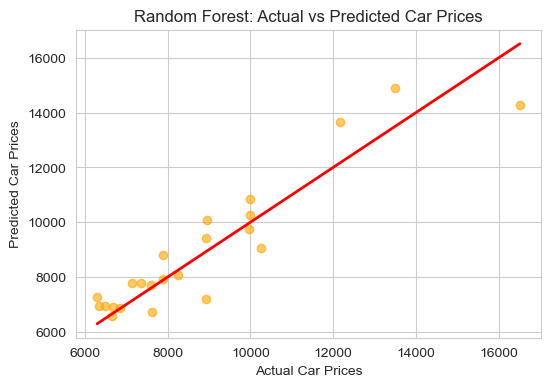

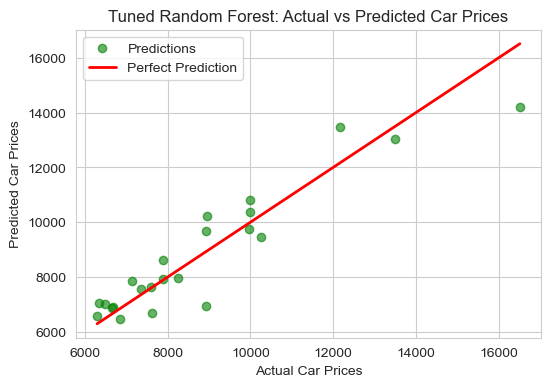

In [85]:
RF = RandomForestRegressor(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)

y_pred_RF = RF.predict(X_test)

plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")

plt.scatter(y_test, y_pred_RF, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Perfect prediction line
plt.xlabel("Actual Car Prices")
plt.ylabel("Predicted Car Prices")
plt.title("Random Forest: Actual vs Predicted Car Prices")

y_pred_best = best_rf.predict(X_test)
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")
plt.scatter(y_test, y_pred_best, color='green', alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')

plt.xlabel("Actual Car Prices")
plt.ylabel("Predicted Car Prices")
plt.title("Tuned Random Forest: Actual vs Predicted Car Prices")
plt.legend()
plt.show()
plt.show()

*Performance evalation of Random Forest afater parameter tuning.*

*R² Score	befre tuning       0.858812	    after tuning    0.871905	higher is better.
MSE         befre tuning       856,840.6    after tuning	777,384.4	lower is better.
MAE	        befre tuning       717.66	    after tuning    675.48	    lower is better.*